In [102]:
import os, math, subprocess
import datetime as dt

#data wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#excel library
import xlrd

In [103]:
#Loading data
df_transactions = pd.read_excel('KPMG.xlsx', sheet_name= 'Transactions')
df_transactions = df_transactions.astype({"online_order":'bool'})
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [104]:
df_cost = df_transactions
df_cost = df_cost.dropna()
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19803 non-null int64
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
online_order               19803 non-null bool
order_status               19803 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 2.0+ MB


1. Standard_cost

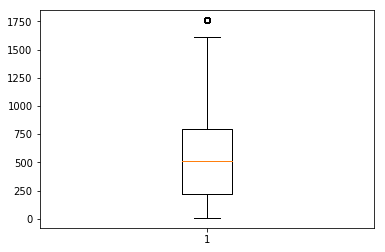

In [105]:
plt.boxplot(df_cost['standard_cost'])
plt.show()

In [106]:
df_transactions['standard_cost'].max()

1759.85

In [107]:
df_transactions['standard_cost'].min()

7.21

In [108]:
#df_transactions[df_transactions['standard_cost']>1750]

In [109]:
#df_transactions[df_transactions['standard_cost']>1750].count()

2. product_first_sold_date

In [110]:
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

df_cost['product_first_sold_date'] = pd.to_datetime(df_cost['product_first_sold_date'].apply(read_date), errors='coerce')
df_cost.product_first_sold_date.head()

C:\Users\My Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0   2012-12-02
1   2014-03-03
2   1999-07-20
3   1998-12-16
4   2015-08-10
Name: product_first_sold_date, dtype: datetime64[ns]

In [111]:
print('min DOB: ', df_cost['product_first_sold_date'].min())
print('max DOB: ', df_cost['product_first_sold_date'].max())

min DOB:  1991-01-21 00:00:00
max DOB:  2016-12-06 00:00:00


3. Checking for illogicial tolerant between list price and standard cost

In [112]:
#comparation of min and max between list_price and standard_cost
test2 = df_transactions.groupby(['product_line','product_class','product_size'])['list_price','standard_cost'].agg(['min','max','sum'])
test2 = test2.reset_index()
test2

product_line product_class product_size list_price                       \
                                                  min      max         sum   
0      Mountain           low       medium     574.64   574.64   128144.72   
1      Mountain           low        small     688.63   688.63   137726.00   
2          Road          high        large      12.01   774.53   150277.18   
3          Road           low       medium     980.37   980.37   197054.37   
4          Road           low        small     590.26  1720.70   590615.72   
5          Road        medium        large    1240.31  1894.19  1028840.61   
6          Road        medium       medium     290.62  1538.99  1397589.06   
7          Road        medium        small    1703.52  1810.00   677151.20   
8      Standard          high        large    1842.92  1842.92   350154.80   
9      Standard          high       medium     227.88  2005.66  2099212.89   
10     Standard          high        small    1661.92  1977.36   689716.56   
11     Standard           low       medium      71.16  1793.43  1450065.55   
12     Standard        medium        large     202.62  2091.47  2846312.62   
13     Standard        medium       medium      60.34  1992.93  6672426.52   
14     Standard        medium        small     175.89  1775.81  1527055.02   
15      Touring           low       medium    1073.07  1073.07   245733.03   
16      Touring        medium        large    1362.99  2083.94  1477870.05   
17      Touring        medium       medium    1466.68  1466.68   275735.84   

   standard_cost                         
             min      max           sum  
0         459.71   459.71  1.025153e+05  
1         612.88   612.88  1.225760e+05  
2           7.21   464.72  9.016747e+04  
3         234.43   234.43  4.712043e+04  
4         525.33  1531.42  5.256466e+05  
5         598.76   820.78  4.608469e+05  
6         206.35   829.65  9.146857e+05  
7        1516.13  1610.90  6.026641e+05  
8        1105.75  1105.75  2.100925e+05  
9         136.73  1203.40  1.259528e+06  
10       1479.11  1759.85  6.138479e+05  
11         56.93   748.90  5.331041e+05  
12        151.96   993.66  1.079133e+06  
13         13.44   954.82  2.445840e+06  
14        131.92  1580.47  1.354449e+06  
15        933.84   933.84  2.138494e+05  
16         57.74   863.95  3.670407e+05  
17        363.25   363.25  6.829100e+04

In [3]:
df_transactions['price_disparity'] = (df_transactions[('list_price')] / df_transactions[('standard_cost')])*100
df_transactions[df_transactions['price_disparity'] >2].sort_values(['-','price_disparity'],ascending=False)''

SyntaxError: invalid syntax (<ipython-input-3-d0a52af38a77>, line 2)